## Random bidding strategy 2: testing ranges around the mode

In [8]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

#Import validation and testing data sets
rtb_train = pd.read_csv("train.csv")
rtb_train_cropped = rtb_train[['payprice','click','bidprice']]
rtb_validation = pd.read_csv("validation.csv")
rtb_validation_cropped = rtb_validation[['payprice','click']]

In [3]:
#Determine bid prices boundaries with Standard deviation intervalls
meanPayPrice = rtb_validation_cropped['payprice'].mean()
payPriceStd = rtb_validation_cropped['payprice'].std()
print(meanPayPrice)
print(payPriceStd)
maxPrice = (rtb_train_cropped.loc[:,"payprice"].max())
minPrice = (rtb_train_cropped.loc[:,"payprice"].min())


78.23400509994242
60.026062850969545


In [4]:
#Starting point is the mean of the clicked impressions pay price
constantPrice = 70
bidPriceListUpperBound = []
bidPriceListLowerBound = []
count = 0

#Determine upper bid price boundaries for the constant bid range
while (count < 150):
    constantPrice +=1
    bidPriceListUpperBound.append(constantPrice)
    count = count +1
    
numberBids = []
wonBids = []
CTR = [] 
numberClicks = [] 
CPC = [] 
CPM = []
eCPC = []

#Repeating bidding in validation set j times
for j in range (0,len(bidPriceListUpperBound)):
    budget = 6250
    bids = 0
    impressions = 0
    clicks = 0
    
    #Creates an array of random bid prices in the boundaries declared above
    randomBids = []
    for i in range(0,len(rtb_validation)):
        bid = random.randrange(minPrice,bidPriceListUpperBound[j],1)
        randomBids.append(bid)
    
    rtb_validation['random_bids'] = randomBids
    
    for i in range(0,len(rtb_validation_cropped)):
        if budget > 0 and budget > (rtb_validation_cropped['payprice'].values[i]/1000):
            impressions += 1
            if (rtb_validation['random_bids'].values[i]/1000) > (rtb_validation_cropped['payprice'].values[i]/1000):
                bids += 1
                clicks += rtb_validation_cropped['click'].values[i]
                budget = budget - (rtb_validation_cropped['payprice'].values[i]/1000)
        else: 
            print("Budget is spent!")
            break
    ctr = (clicks/impressions)*100    
    cpm = 6250/impressions
    cpc = 6250/clicks
        #Output for the alrogithm
    print("Output")
    print(bidPriceListUpperBound[j])
    numberBids.append(impressions)
    print(numberBids)
    wonBids.append(bids)
    print(wonBids)
    CTR.append(ctr)
    print(CTR)
    numberClicks.append(clicks)
    print(numberClicks)
    CPC.append(cpc)
    print(CPC)
    CPM.append(cpm)
    print(CPM)

Output
71
[303925]
[75810]
[0.009541827753557622]
[29]
[215.51724137931035]
[0.020564283951632803]
Output
72
[303925, 303925]
[75810, 76980]
[0.009541827753557622, 0.00888377066710537]
[29, 27]
[215.51724137931035, 231.4814814814815]
[0.020564283951632803, 0.020564283951632803]
Output
73
[303925, 303925, 303925]
[75810, 76980, 78337]
[0.009541827753557622, 0.00888377066710537, 0.006580570864522498]
[29, 27, 20]
[215.51724137931035, 231.4814814814815, 312.5]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803]
Output
74
[303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775]
[0.009541827753557622, 0.00888377066710537, 0.006580570864522498, 0.006580570864522498]
[29, 27, 20, 20]
[215.51724137931035, 231.4814814814815, 312.5, 312.5]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803]
Output
75
[303925, 303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775, 81305]
[0.009541827753557622, 0.00888377066710537, 0.006580570864522498

Output
85
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483]
[0.009541827753557622, 0.00888377066710537, 0.006580570864522498, 0.006580570864522498, 0.009212799210331496, 0.008225713580653122, 0.01019988484000987, 0.009212799210331496, 0.011186970469688246, 0.011186970469688246, 0.010857941926462122, 0.010857941926462122, 0.01019988484000987, 0.011845027556140496, 0.011845027556140496]
[29, 27, 20, 20, 28, 25, 31, 28, 34, 34, 33, 33, 31, 36, 36]
[215.51724137931035, 231.4814814814815, 312.5, 312.5, 223.21428571428572, 250.0, 201.61290322580646, 223.21428571428572, 183.8235294117647, 183.8235294117647, 189.3939393939394, 189.3939393939394, 201.61290322580646, 173.61111111111111, 173.61111111111111]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.0205

Output
91
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408]
[0.009541827753557622, 0.00888377066710537, 0.006580570864522498, 0.006580570864522498, 0.009212799210331496, 0.008225713580653122, 0.01019988484000987, 0.009212799210331496, 0.011186970469688246, 0.011186970469688246, 0.010857941926462122, 0.010857941926462122, 0.01019988484000987, 0.011845027556140496, 0.011845027556140496, 0.011845027556140496, 0.011186970469688246, 0.011845027556140496, 0.013819198815497244, 0.011845027556140496, 0.01151599901291437]
[29, 27, 20, 20, 28, 25, 31, 28, 34, 34, 33, 33, 31, 36, 36, 36, 34, 36, 42, 36, 35]
[215.51724137931035, 231.4814814814815, 312.5, 312.5, 223.21428571428572, 250.0, 201.61290322580646, 223.21428571428572, 183.82

Output
96
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350]
[0.009541827753557622, 0.00888377066710537, 0.006580570864522498, 0.006580570864522498, 0.009212799210331496, 0.008225713580653122, 0.01019988484000987, 0.009212799210331496, 0.011186970469688246, 0.011186970469688246, 0.010857941926462122, 0.010857941926462122, 0.01019988484000987, 0.011845027556140496, 0.011845027556140496, 0.011845027556140496, 0.011186970469688246, 0.011845027556140496, 0.013819198815497244, 0.011845027556140496, 0.01151599901291437, 0.013161141729044996, 0.01776754133421074, 0.01349017027227112, 0.01414822735872337, 0.01546434153162787]
[29, 27, 20, 20, 28, 25, 3

Output
100
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136]
[0.009541827753557622, 0.00888377066710537, 0.006580570864522498, 0.006580570864522498, 0.009212799210331496, 0.008225713580653122, 0.01019988484000987, 0.009212799210331496, 0.011186970469688246, 0.011186970469688246, 0.010857941926462122, 0.010857941926462122, 0.01019988484000987, 0.011845027556140496, 0.011845027556140496, 0.011845027556140496, 0.011186970469688246, 0.011845027556140496, 0.013819198815497244, 0.011845027556140496, 0.01151599901291437, 0.013161141729044996, 0.01776754133421074, 0.01349017027227112, 0.0

Output
104
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842]
[0.009541827753557622, 0.00888377066710537, 0.006580570864522498, 0.006580570864522498, 0.009212799210331496, 0.008225713580653122, 0.01019988484000987, 0.009212799210331496, 0.011186970469688246, 0.011186970469688246, 0.010857941926462122, 0.010857941926462122, 0.01019988484000987, 0.011845027556140496, 0.011845027556140496, 0.011845027556140496, 0.011186970469688246, 0.011845027556140496, 0.013819198815497244, 0.011845027556140496, 0.01151599901291437, 0.0

Output
107
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126]
[0.009541827753557622, 0.00888377066710537, 0.006580570864522498, 0.006580570864522498, 0.009212799210331496, 0.008225713580653122, 0.01019988484000987, 0.009212799210331496, 0.011186970469688246, 0.011186970469688246, 0.010857941926462122, 0.010857941926462122, 0.01019988484000987, 0.011845027556140496, 0.011845027556140496, 0.011845027556140496, 0.011186970469688246, 0.011845027556140496, 0.013819198815497244

Output
110
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121]
[0.009541827753557622, 0.00888377066710537, 0.006580570864522498, 0.006580570864522498, 0.009212799210331496, 0.008225713580653122, 0.01019988484000987, 0.009212799210331496, 0.011186970469688246, 0.011186970469688246, 0.010857941926462122, 0.010857941926462122, 0.01019988484000987, 0.011845027556140496, 0.011845027556140496, 0.011845027556140496, 0.01118697046968

Output
113
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 126269, 126916]
[0.009541827753557622, 0.00888377066710537, 0.006580570864522498, 0.006580570864522498, 0.009212799210331496, 0.008225713580653122, 0.01019988484000987, 0.009212799210331496, 0.011186970469688246, 0.011186970469688246, 0.010857941926462122, 0.010857941926462122, 0.01019988484000987, 0.011845027556140496, 0.0118450275

Output
116
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 126269, 126916, 127700, 129342, 130535]
[0.009541827753557622, 0.00888377066710537, 0.006580570864522498, 0.006580570864522498, 0.009212799210331496, 0.008225713580653122, 0.01019988484000987, 0.009212799210331496, 0.011186970469688246, 0.011186970469688246, 0.010857941926462122, 0.010857941926462122, 0.01019

Output
119
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 126269, 126916, 127700, 129342, 130535, 130996, 131928, 132914]
[0.009541827753557622, 0.00888377066710537, 0.006580570864522498, 0.006580570864522498, 0.009212799210331496, 0.008225713580653122, 0.01019988484000987, 0.009212799210331496, 0.011186970469688246, 0.011186970469688246, 0.0

Output
122
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 126269, 126916, 127700, 129342, 130535, 130996, 131928, 132914, 133751, 135009, 135689]
[0.009541827753557622, 0.00888377066710537, 0.006580570864522498, 0.006580570864522498, 0.009212799210331496, 0.008225713580653122, 0.01019988484000987, 0.009212799210331496,

Output
124
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 126269, 126916, 127700, 129342, 130535, 130996, 131928, 132914, 133751, 135009, 135689, 136328, 137092]
[0.009541827753557622, 0.00888377066710537, 0.006580570864522498, 0.006580570864522498, 0.009212799210331496, 0.008225713580653122, 0.01019988

Output
126
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 126269, 126916, 127700, 129342, 130535, 130996, 131928, 132914, 133751, 135009, 135689, 136328, 137092, 138612, 139062]
[0.009541827753557622, 0.00888377066710537, 0.006580570864522498, 0.006580570864522498, 0.009212799210331496, 

Output
128
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 126269, 126916, 127700, 129342, 130535, 130996, 131928, 132914, 133751, 135009, 135689, 136328, 137092, 138612, 139062, 139652, 140575]
[0.009541827753557622, 0.00888377066710537, 0.006580570864522498, 0.0065805708

Output
130
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 126269, 126916, 127700, 129342, 130535, 130996, 131928, 132914, 133751, 135009, 135689, 136328, 137092, 138612, 139062, 139652, 140575, 141605, 142481]
[0.009541827753557622, 0.00888377066710537, 0.

Output
132
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 126269, 126916, 127700, 129342, 130535, 130996, 131928, 132914, 133751, 135009, 135689, 136328, 137092, 138612, 139062, 139652, 140575, 141605, 142481, 143419, 144151]
[0.00954182775

Output
134
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 126269, 126916, 127700, 129342, 130535, 130996, 131928, 132914, 133751, 135009, 135689, 136328, 137092, 138612, 139062, 139652, 140575, 141605, 142481, 143419, 144151

Budget is spent!
Output
136
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 126269, 126916, 127700, 129342, 130535, 130996, 131928, 132914, 133751, 135009, 135689, 136328, 137092, 138612, 139062, 139652, 14057

Budget is spent!
Output
138
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 126269, 126916, 127700, 129342, 130535, 130996, 131928, 132914, 133751, 135009, 135689, 136328, 137092, 138612, 13906

Budget is spent!
Output
140
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 126269, 126916, 127700, 129342, 130535, 130996, 131928, 132914, 133751, 135009, 135689, 136328, 13709

Budget is spent!
Output
142
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 126269, 126916, 127700, 129342, 130535, 130996, 131928, 132914, 133751, 135009, 13568

Budget is spent!
Output
144
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 126269, 126916, 127700, 129342, 130535, 130996, 131928, 132914, 13375

Budget is spent!
Output
146
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 126269, 126916, 127700, 129342, 130535, 130996, 13192

Budget is spent!
Output
148
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 126269, 126916, 127700, 129342, 13053

Budget is spent!
Output
150
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 126269, 126916, 12770

Budget is spent!
Output
152
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 124121, 125073, 12626

Budget is spent!
Output
154
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 122481, 123268, 12412

Budget is spent!
Output
156
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 120285, 121126, 12248

Budget is spent!
Output
158
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 117842, 119042, 12028

Budget is spent!
Output
160
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 115486, 116758, 11784

Budget is spent!
Output
162
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 113136, 114267, 11548

Budget is spent!
Output
164
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 110984, 112179, 11313

Budget is spent!
Output
166
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 108350, 109711, 11098

Budget is spent!
Output
168
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 106113, 106937, 10835

Budget is spent!
Output
170
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 104591, 10611

Budget is spent!
Output
171
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 103265, 10459

Budget is spent!
Output
172
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 102408, 10326

Budget is spent!
Output
173
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 100835, 10240

Budget is spent!
Output
174
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 99691, 10083

Budget is spent!
Output
175
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 98213, 9969

Budget is spent!
Output
176
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96830, 982

Budget is spent!
Output
177
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 95683, 96

Budget is spent!
Output
178
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 94483, 9

Budget is spent!
Output
179
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878, 92918, 

Budget is spent!
Output
180
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476, 91878,

Budget is spent!
Output
181
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 88736, 90476

Budget is spent!
Output
182
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 87626, 8873

Budget is spent!
Output
183
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86238, 876

Budget is spent!
Output
184
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 84705, 86

Budget is spent!
Output
185
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204]
[75810, 76980, 78337, 79775, 81305, 82470, 83791, 8

Budget is spent!
Output
186
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320]
[75810, 76980, 78337, 79775, 81305, 82470, 

Budget is spent!
Output
187
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609]
[75810, 76980, 78337, 79775, 81305,

Budget is spent!
Output
188
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343]
[75810, 76980, 78337, 79775

Budget is spent!
Output
189
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379]
[75810, 76980, 7833

Budget is spent!
Output
190
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940]
[75810, 769

Budget is spent!
Output
191
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275]
[75

Budget is spent!
Output
192
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
193
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
194
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
195
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
196
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
197
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
198
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
199
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
200
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
201
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
202
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
203
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
204
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
205
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
206
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
207
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
208
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
209
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
210
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
211
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
212
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
213
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
214
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
215
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
216
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
217
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
218
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
219
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

Budget is spent!
Output
220
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 301546, 299805, 295995, 292871, 290904, 289294, 286064, 283933, 281459, 279937, 276700, 275166, 272235, 271053, 268831, 266708, 264486, 261705, 260474, 258992, 256920, 253951, 253518, 251508, 249980, 247286, 246134, 244124, 243059, 241343, 241451, 237449, 237288, 235035, 233413, 232005, 230331, 228595, 227822, 226513, 224656, 223031, 222619, 219998, 219166, 217724, 216971, 214493, 213340, 213299, 212204, 210320, 209609, 208343, 207379, 205940, 204275, 203

In [12]:
#Store summary statistics in a dataframe and plot graphs for each of them
summaryStatistics = pd.DataFrame({
    'Constant bid price': bidPriceListUpperBound,
    'numberBids': numberBids,
    'wonBids': wonBids,
    'CTR': CTR,
    'Clicks': numberClicks,
    'eCPC': CPC, 
    'CPM': CPM,
})
print(summaryStatistics)

          CPM       CTR  Clicks  Constant bid price        eCPC  numberBids  \
0    0.020564  0.009542      29                  71  215.517241      303925   
1    0.020564  0.008884      27                  72  231.481481      303925   
2    0.020564  0.006581      20                  73  312.500000      303925   
3    0.020564  0.006581      20                  74  312.500000      303925   
4    0.020564  0.009213      28                  75  223.214286      303925   
5    0.020564  0.008226      25                  76  250.000000      303925   
6    0.020564  0.010200      31                  77  201.612903      303925   
7    0.020564  0.009213      28                  78  223.214286      303925   
8    0.020564  0.011187      34                  79  183.823529      303925   
9    0.020564  0.011187      34                  80  183.823529      303925   
10   0.020564  0.010858      33                  81  189.393939      303925   
11   0.020564  0.010858      33                  82 

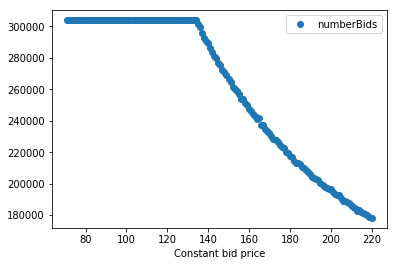

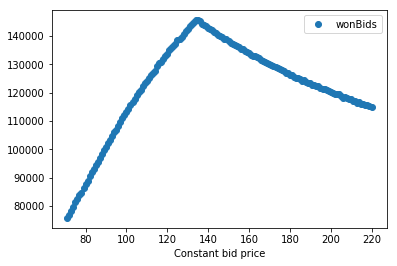

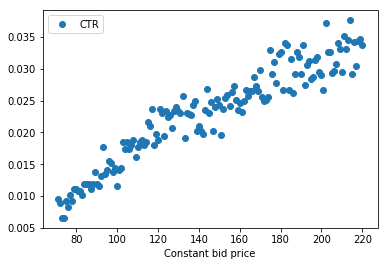

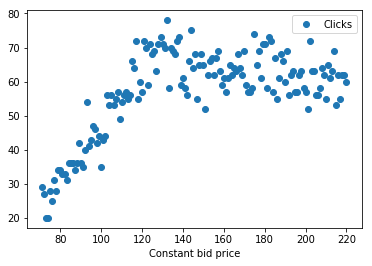

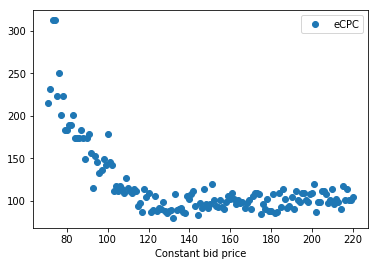

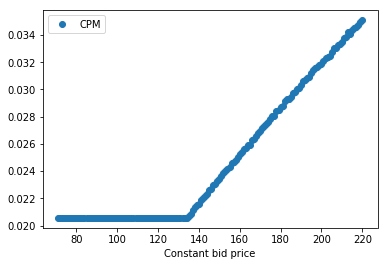

In [13]:
summaryStatistics.plot(x='Constant bid price', y='numberBids', style='o'); summaryStatistics.plot(x='Constant bid price', y='wonBids', style='o')
summaryStatistics.plot(x='Constant bid price', y='CTR', style='o')
summaryStatistics.plot(x='Constant bid price', y='Clicks', style='o')
summaryStatistics.plot(x='Constant bid price', y='eCPC', style='o')
summaryStatistics.plot(x='Constant bid price', y='CPM', style='o')

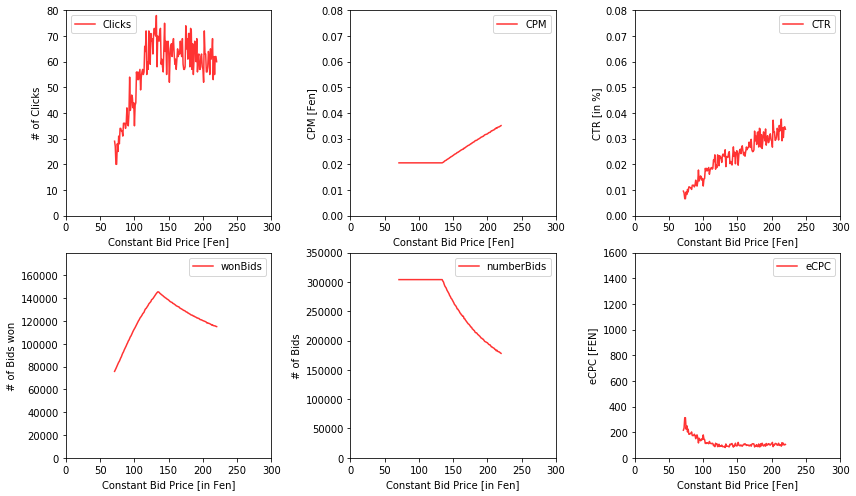

In [14]:
# VALIDATION SET - Budget of 6250
# plt.figure()
fig, axes = plt.subplots(nrows= 2, ncols = 3, figsize=(12,7) )


#Clicks - 1
ax1= summaryStatistics.plot(ax=axes[0,0],x='Constant bid price', y='Clicks',color ='red', alpha = 0.8)
ax1.set_ylabel('# of Clicks')
ax1.set_xlabel('Constant Bid Price [Fen]')
ax1.set_xticks(np.arange(0,305,50))
ax1.set_yticks(np.arange(0,100,10))
ax1.set_ylim(top=80)
# ymax = summaryStatistics['Clicks'].max()
# xpos = numberClicks.index(ymax)
# xmax = summaryStatistics.iloc[xpos]['Constant bid price']
# ax1.annotate('local max', xy=(80,68), xytext=(80,73),
# arrowprops=dict(facecolor='black', shrink=0.05),)

#Impressions won - 2
ax2= summaryStatistics.plot(ax=axes[0,1],x='Constant bid price', y='CPM',color ='red', alpha = 0.8)
ax2.set_ylabel('CPM [Fen]')
ax2.set_xlabel('Constant Bid Price [Fen]')
ax2.set_xticks(np.arange(0,305,50))
ax2.set_yticks(np.arange(0,0.1,0.01))
ax2.set_ylim(top=0.08)

#Win ratio - 3
ax3= summaryStatistics.plot(ax=axes[0,2],x='Constant bid price', y='CTR',color ='red', alpha = 0.8)
ax3.set_ylabel('CTR [in %]')
ax3.set_xlabel('Constant Bid Price [Fen]')
ax3.set_xticks(np.arange(0,305,50))
ax3.set_yticks(np.arange(0,0.1,0.01))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax3.set_ylim(top=0.08)

#CTR -  4
ax4= summaryStatistics.plot(ax=axes[1,0],x='Constant bid price', y='wonBids',color ='red', alpha = 0.8)
ax4.set_ylabel('# of Bids won')
ax4.set_xlabel('Constant Bid Price [in Fen]')
ax4.set_xticks(np.arange(0,305,50))
ax4.set_yticks(np.arange(0,180000,20000))
ax4.set_ylim(top=180000)

#CPM - 5
ax5= summaryStatistics.plot(ax=axes[1,1],x='Constant bid price', y='numberBids',color ='red', alpha = 0.8)
ax5.set_ylabel('# of Bids')
ax5.set_xlabel('Constant Bid Price [in Fen]')
ax5.set_xticks(np.arange(0,305,50))
ax5.set_yticks(np.arange(0,1000000,50000))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax5.set_ylim(top=350000)

#eCPC - 6
ax6= summaryStatistics.plot(ax=axes[1,2],x='Constant bid price', y='eCPC',color ='red', alpha = 0.8)
ax6.set_ylabel('eCPC [FEN]')
ax6.set_xlabel('Constant Bid Price [Fen]')
ax6.set_xticks(np.arange(0,305,50))
ax6.set_yticks(np.arange(0,1800,200))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax6.set_ylim(top=1600)

plt.tight_layout(h_pad = 0.2)

#Save image
plt.savefig('numberBids.pdf',bbox_inches='tight')